# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/rez_sample_03ALL/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Unnamed: 0,Branch,Option,Build Time,Binary Size
0,0,icurl-00001-00002,"['--disable-shared', '--disable-largefile', '-...",20.3420,4898824
1,1,icurl-00001-00003,"['--disable-shared', '--disable-largefile', '-...",0.1060,4898824
2,2,icurl-00001-00004,"['--disable-shared', '--enable-silent-rules', ...",20.7975,4898824
3,3,icurl-00001-00005,"['--disable-shared', '--disable-debug', '--dis...",0.0615,4898824
4,4,icurl-00001-00006,"['--disable-shared', '--disable-silent-rules',...",1.2285,4898824
...,...,...,...,...,...
375,375,icurl-00020-00015,"['--disable-shared', '--disable-largefile', '-...",38.2210,3426560
376,376,icurl-00020-00016,"['--disable-shared', '--disable-largefile', '-...",1.2375,4208096
377,377,icurl-00020-00017,"['--disable-shared', '--disable-largefile', '-...",24.9175,4450064
378,378,icurl-00020-00018,"['--disable-shared', '--disable-largefile', '-...",0.2700,4208096


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")

df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Unnamed: 0,Branch,Option,Build Time,Binary Size,Br0,Br1,Br2
0,0,icurl-00001-00002,"['--disable-shared', '--disable-largefile', '-...",20.3420,4898824,icurl,00001,00002
1,1,icurl-00001-00003,"['--disable-shared', '--disable-largefile', '-...",0.1060,4898824,icurl,00001,00003
2,2,icurl-00001-00004,"['--disable-shared', '--enable-silent-rules', ...",20.7975,4898824,icurl,00001,00004
3,3,icurl-00001-00005,"['--disable-shared', '--disable-debug', '--dis...",0.0615,4898824,icurl,00001,00005
4,4,icurl-00001-00006,"['--disable-shared', '--disable-silent-rules',...",1.2285,4898824,icurl,00001,00006
...,...,...,...,...,...,...,...,...
375,375,icurl-00020-00015,"['--disable-shared', '--disable-largefile', '-...",38.2210,3426560,icurl,00020,00015
376,376,icurl-00020-00016,"['--disable-shared', '--disable-largefile', '-...",1.2375,4208096,icurl,00020,00016
377,377,icurl-00020-00017,"['--disable-shared', '--disable-largefile', '-...",24.9175,4450064,icurl,00020,00017
378,378,icurl-00020-00018,"['--disable-shared', '--disable-largefile', '-...",0.2700,4208096,icurl,00020,00018


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN   0.2525   0.2095   0.2705   0.0515   0.0525   0.2730   
00002    20.3420      NaN  37.7785  38.7685  20.1585  20.3935  39.1740   
00003     0.1060  25.9960      NaN  26.4320   0.1075   0.1075  26.7995   
00004    20.7975  39.8955  39.6230      NaN  20.6060  20.7470  39.8090   
00005     0.0615   0.3060   0.2595   0.3200      NaN   0.0620   0.3205   
00006     1.2285   1.2150   1.2320   1.2245   1.1650      NaN   1.2380   
00007     0.1170  18.9120  18.6550  19.2220   0.1170   0.1155      NaN   
00008     0.0545   0.3000   0.2560   0.3155   0.0520   0.0535   0.3155   
00009     0.0615   0.0625   0.0600   0.0640   0.0605   0.0605   0.0615   
00010     0.1060  19.8115  19.6645  19.8180   0.1040   0.1090  19.6130   
00011    26.5555  51.5900  51.1925  52.1185  26.1820  26.5015  51.6025   
00012     1.1185  22.2890  21.9450  22.3385   1.0690   1.0780  22.0465   
00013    19.1725  36.3410  36.3910  37.0930  19.0645  19.1420  36.7480   
00014    34.6790  65.8525  64.6340  65.5755  34.4050  34.4020  65.1115   
00015    19.6780  37.9605  37.0045  38.1385  19.4765  19.8935  37.8260   
00016    21.4560   1.2265  21.3700   1.2545  21.2000  21.2700  21.5715   
00017     0.1155  24.8835  24.6960  25.0460   0.1155   0.1170  24.6760   
00018     0.0535   0.2545   0.2100   0.2595   0.0525   0.0530   0.2735   
00019     1.0760  17.3970  17.2425  17.3510   1.0645   1.0610  17.3225   
00020    28.2280  53.0750  52.3735  52.6625  27.9565  27.9560  52.4350   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001   0.0540   0.0535   0.2700   0.2645   0.2165   0.2420   0.2645   0.2600   
00002  20.9685  20.2495  38.4765  38.4480  38.1680  38.4170  38.4365  38.6145   
00003   0.1105   0.1065  26.3530  26.2325  26.0725  26.2540  26.3040  26.2555   
00004  21.1270  21.1095  39.9125  40.0280  39.8190  39.9540  40.1400  40.0960   
00005   0.0630   0.0600   0.3180   0.3115   0.2635   0.2895   0.3140   0.3080   
00006   1.2460   1.2465   1.2225   1.2280   1.1775   1.1825   1.2300   1.2235   
00007   0.1190   0.1195  18.9850  18.8860  18.8995  19.0225  19.1165  18.9695   
00008      NaN   0.0555   0.3180   0.3075   0.2620   0.2925   0.3210   0.3010   
00009   0.0620      NaN   0.0690   0.0615   0.0605   0.0605   0.0615   0.0615   
00010   0.1115   0.1190      NaN  19.7865  19.6630  19.7690  19.8340  19.8435   
00011  27.4060  27.5760  51.7935      NaN  51.5350  51.5865  51.7630  51.6710   
00012   1.0775   1.1060  22.1650  22.2050      NaN  22.0655  22.2900  22.2330   
00013  19.5825  19.1100  36.6895  36.7450  36.6400      NaN  36.7480  36.8390   
00014  36.1405  36.0645  65.0860  65.1685  64.5620  65.1700      NaN  65.5680   
00015  19.9775  19.9780  37.9015  37.8960  37.7010  37.7690  37.7675      NaN   
00016  21.7380  21.6535  21.5575   1.0110  21.4185   1.2150   1.2475   1.2225   
00017   0.1220   0.1195  24.7680  24.9020  24.7785  24.8790  25.0340  24.8785   
00018   0.0745   0.0515   0.2710   0.2510   0.2150   0.0515   0.2610   0.2540   
00019   1.0800   1.1085  17.3810  17.4200  17.3300  17.3470  17.4285  17.4645   
00020  28.9920  29.2865  52.5200  52.5950  52.3850  52.7410  52.8570  52.7460   

                                                   
Br1     00016    00017    00018    00019    00020  
Br2                                                
00001  0.0560   0.2900   0.0520   0.0515   0.2705  
00002  1.0605  38.8455  20.3120  38.2230  38.8665  
00003  0.1090  26.3620   0.1075  25.9880  26.4595  
00004  0.1110  40.0360  20.4270  39.9250  40.1915  
00005  0.0645   0.3235   0.0615   0.2630   0.3185  
00006  1.2370   1.2200 

In [5]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00005)"
00002,"(Build Time, 00016)"
00003,"(Build Time, 00001)"
00004,"(Build Time, 00016)"
00005,"(Build Time, 00009)"
00006,"(Build Time, 00005)"
00007,"(Build Time, 00006)"
00008,"(Build Time, 00005)"


In [6]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  3669216.0   644608.0  4356640.0  1067672.0  4516392.0   
00002   4898824.0        NaN  3457816.0  3669216.0  1067672.0  4516392.0   
00003   4898824.0   644608.0        NaN   644608.0  1067672.0  4516392.0   
00004   4898824.0  4356640.0  4136632.0        NaN  1067672.0  4516392.0   
00005   4898824.0  3669216.0   644608.0  4356640.0        NaN  4516392.0   
00006   4898824.0  3669216.0   667784.0  4356640.0  1067672.0        NaN   
00007   4898824.0  4292872.0  4292872.0  4292872.0  1067672.0  4516392.0   
00008   4898824.0  3669216.0   644608.0  4356640.0  1067672.0  4516392.0   
00009   4898824.0  3669216.0   644608.0  4356640.0  1067672.0  4516392.0   
00010   4898824.0  4521984.0  4301976.0  4521984.0  1067672.0  4516392.0   
00011   4898824.0  4493712.0  4268128.0  4493712.0  1067672.0  4516392.0   
00012   4898824.0   855600.0   646704.0   855600.0  1067672.0  4516392.0   
00013   4898824.0  2741048.0  2741048.0  2741048.0  1067672.0  4516392.0   
00014   4898824.0  4759672.0  4529984.0  4759672.0  1067672.0  4516392.0   
00015   4898824.0  3637952.0  3426560.0  3637952.0  1067672.0  4516392.0   
00016   4898824.0  3669216.0   644608.0  4356640.0  1067672.0  4516392.0   
00017   4898824.0  4670072.0  4450064.0  4670072.0  1067672.0  4516392.0   
00018   4898824.0  3669216.0   644608.0  4356640.0  1067672.0  4516392.0   
00019   4898824.0  1149776.0   940880.0  1149776.0  1067672.0  4516392.0   
00020   4898824.0  4208096.0  4208096.0  4208096.0  1067672.0  4516392.0   

                                                                        \
Br1        00007      00008     00009      00010      00011      00012   
Br2                                                                      
00001  4292872.0  4783008.0  784552.0  4521984.0  4493712.0   855600.0   
00002  3457816.0  4783008.0  784552.0  3669216.0  3669216.0  3669216.0   
00003   644608.0  4783008.0  784552.0   644608.0   644608.0   644608.0   
00004  4136632.0  4783008.0  784552.0  4356640.0  4356640.0  4356640.0   
00005  4292872.0  4783008.0  784552.0  4521984.0  4493712.0   855600.0   
00006  4292872.0  4783008.0  784552.0  4521984.0  4493712.0   855600.0   
00007        NaN  4783008.0  784552.0  4292872.0  4292872.0  4292872.0   
00008  4292872.0        NaN  784552.0  4521984.0  4493712.0   855600.0   
00009  4292872.0  4783008.0       NaN  4521984.0  4493712.0   855600.0   
00010  4301976.0  4783008.0  784552.0        NaN  4521984.0  4521984.0   
00011  4268128.0  4783008.0  784552.0  4493712.0        NaN  4493712.0   
00012   646704.0  4783008.0  784552.0   855600.0   855600.0        NaN   
00013  2741048.0  4783008.0  784552.0  2741048.0  2741048.0  2741048.0   
00014  4529984.0  4783008.0  784552.0  4759672.0  4759672.0  4759672.0   
00015  3426560.0  4783008.0  784552.0  3637952.0  3637952.0  3637952.0   
00016  4292872.0  4783008.0  784552.0  4521984.0  4493712.0   855600.0   
00017  4450064.0  4783008.0  784552.0  4670072.0  4670072.0  4670072.0   
00018  4292872.0  4783008.0  784552.0  4521984.0  4493712.0   855600.0   
00019   940880.0  4783008.0  784552.0  1149776.0  1149776.0  1149776.0   
00020  4208096.0  4783008.0  784552.0  4208096.0  4208096.0  4208096.0   

                                                                        \
Br1        00013      00014      00015      00016      00017     00018   
Br2                                                                      
00001  2741048.0  4759672.0  3637952.0  4077664.0  4670072.0  723024.0   
00002  3457816.0  3669216.0  3669216.0  4077664.0  3669216.0  723024.0   
00003   644608.0   644608.0   644608.0  4077664.0   644608.0  723024.0   
00004  4136632.0  4356640.0  4356640.0  4077664.0  4356640.0  723024.0   
00005  2741048.0  4759672.0  3637952

In [7]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,0.2900,0.181816,0.0515
00002,39.1740,30.826368,1.0605
00003,26.7995,16.645421,0.1060
00004,40.1915,31.808132,0.1110
00005,0.3235,0.225684,0.0600
00006,1.2465,1.215158,1.1650
00007,19.2220,12.024842,0.1155
00008,0.3210,0.221053,0.0520


In [8]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00006,1.2465,1.215158,1.1650
00020,53.0750,42.273342,1.0770
00014,65.8525,52.307947,1.0720
00012,22.3735,14.405605,1.0690
00002,39.1740,30.826368,1.0605
00019,17.5550,11.378079,1.0510
00016,21.7380,13.995368,1.0110
00015,38.2210,30.148105,0.3555


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

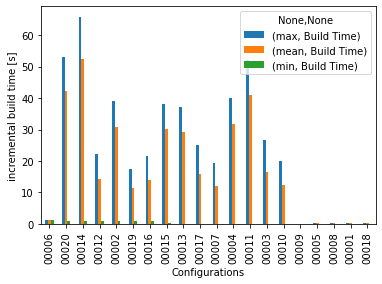

In [9]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

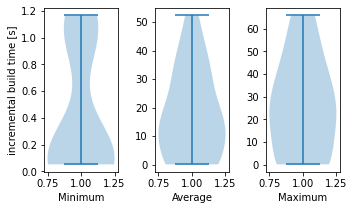

In [10]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [11]:
# Converting the Pivot Table to Data Frame

ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time"
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)

tbl = tbl.set_index("Br2")

pd.set_option("display.max_columns", None)

#tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
#                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
#                '00015', '00016', '00017', '00018', '00019', '00020']]

# Export it to a csv file, to use it in another notebook
tbl[:].to_csv(path + 'i_data_frame.csv', 
                index=True, 
                header=['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020'])

tbl

,00001,00002,00003,00004,00005,00006,00007,00008,00009,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020
Br2,,,,,,,,,,,,,,,,,,,,
00001,NaN,0.2525,0.2095,0.2705,0.0515,0.0525,0.2730,0.0540,0.0535,0.2700,0.2645,0.2165,0.2420,0.2645,0.2600,0.0560,0.2900,0.0520,0.0515,0.2705
00002,20.3420,NaN,37.7785,38.7685,20.1585,20.3935,39.1740,20.9685,20.2495,38.4765,38.4480,38.1680,38.4170,38.4365,38.6145,1.0605,38.8455,20.3120,38.2230,38.8665
00003,0.1060,25.9960,NaN,26.4320,0.1075,0.1075,26.7995,0.1105,0.1065,26.3530,26.2325,26.0725,26.2540,26.3040,26.2555,0.1090,26.3620,0.1075,25.9880,26.4595
00004,20.7975,39.8955,39.6230,NaN,20.6060,20.7470,39.8090,21.1270,21.1095,39.9125,40.0280,39.8190,39.9540,40.1400,40.0960,0.1110,40.0360,20.4270,39.9250,40.1915
00005,0.0615,0.3060,0.2595,0.3200,NaN,0.0620,0.3205,0.0630,0.0600,0.3180,0.3115,0.2635,0.2895,0.3140,0.3080,0.0645,0.3235,0.0615,0.2630,0.3185
00006,1.2285,1.2150,1.2320,1.2245,1.1650,NaN,1.2380,1.2460,1.2465,1.2225,1.2280,1.1775,1.1825,1.2300,1.2235,1.2370,1.2200,1.1720,1.1725,1.2270
00007,0.1170,18.9120,18.6550,19.2220,0.1170,0.1155,NaN,0.1190,0.1195,18.9850,18.8860,18.8995,19.0225,19.1165,18.9695,0.1190,19.0000,0.1160,18.7780,19.2030
00008,0.0545,0.3000,0.2560,0.3155,0.0520,0.0535,0.3155,NaN,0.0555,0.3180,0.3075,0.2620,0.2925,0.3210,0.3010,0.0545,0.3190,0.0520,0.2580,0.3120
00009,0.0615,0.0625,0.0600,0.0640,0.0605,0.0605,0.0615,0.0620,NaN,0.0690,0.0615,0.0605,0.0605,0.0615,0.0615,0.0650,0.0620,0.0600,0.0620,0.0660
